In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os

In [2]:
train=pd.read_csv('C:\\Users\\Admin\\Desktop\Sign Language Classification\\sign_mnist_train.csv')
test=pd.read_csv('C:\\Users\\Admin\\Desktop\Sign Language Classification\\sign_mnist_test.csv')

In [3]:
train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [4]:
test.tail()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
7167,1,135,119,108,102,105,99,61,103,121,...,108,112,116,114,118,180,184,176,167,163
7168,12,157,159,161,164,166,166,171,174,175,...,213,213,213,214,213,211,210,210,209,208
7169,2,190,191,190,191,190,190,192,192,191,...,216,215,213,214,214,213,210,211,209,208
7170,4,201,205,208,209,214,216,218,223,226,...,112,169,255,255,237,113,91,67,70,63
7171,2,173,174,173,174,173,173,175,175,174,...,201,200,197,198,198,197,195,195,193,192


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27455 entries, 0 to 27454
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 164.4 MB


In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7172 entries, 0 to 7171
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 43.0 MB


In [7]:
train.shape

(27455, 785)

In [8]:
test.shape

(7172, 785)

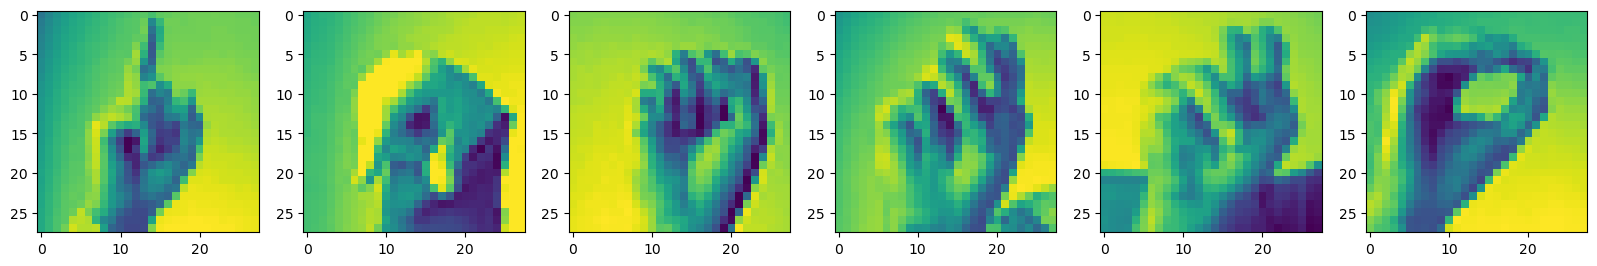

In [9]:
#data visualization 
f=plt.figure(figsize=(20,6))
ax=f.add_subplot(161)
ax2=f.add_subplot(162)
ax3=f.add_subplot(163)
ax4=f.add_subplot(164)
ax5=f.add_subplot(165)
ax6=f.add_subplot(166)
ax.imshow(train.iloc[0].values[1:].reshape(28,28))
ax2.imshow(train.iloc[5].values[1:].reshape(28,28))
ax3.imshow(train.iloc[20].values[1:].reshape(28,28))
ax4.imshow(train.iloc[456].values[1:].reshape(28,28))
ax5.imshow(train.iloc[999].values[1:].reshape(28,28))
ax6.imshow(train.iloc[1500].values[1:].reshape(28,28))
plt.show()

<Axes: ylabel='count'>

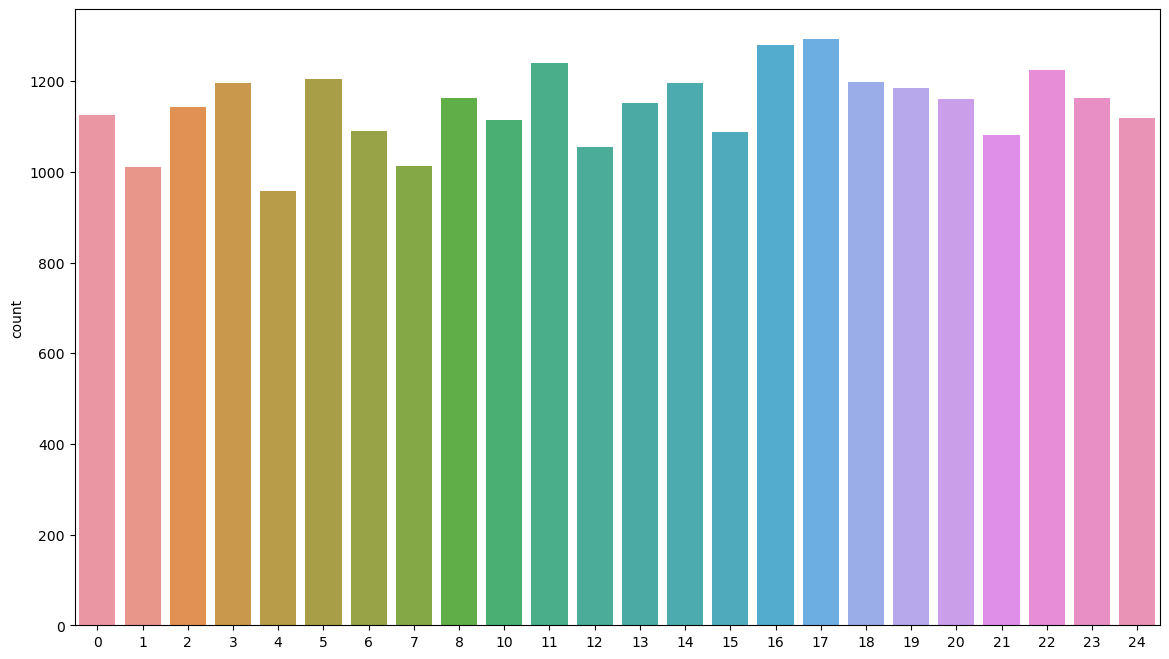

In [10]:
labels=train['label'].values
plt.figure(figsize=(14,8))
sns.countplot(x=labels)

In [11]:
X_train=train.drop(['label'],axis=1)
X_test=test.drop(['label'],axis=1)
Y_train=train['label']
Y_test=test['label']
del train['label']
del test['label']

In [12]:
#data normalization

X_train=X_train/255.0
X_test=X_test/255.0
X_train.shape
X_test.shape

(7172, 784)

In [13]:
X_train=X_train.values.reshape(-1,28,28,1)
X_test=X_test.values.reshape(-1,28,28,1)
X_train.shape
X_test.shape

(7172, 28, 28, 1)

In [14]:
#label Encoding

from sklearn.preprocessing import LabelBinarizer
label_binarizer=LabelBinarizer()
Y_train=label_binarizer.fit_transform(Y_train)

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_val, Y_train, Y_val=train_test_split(X_train, Y_train, test_size=0.2 ,random_state=42)

print('x_train shape',X_train.shape)
print('x_test shape',X_val.shape)
print('y_train shape',Y_train.shape)
print('x_test shape',Y_val.shape)

x_train shape (21964, 28, 28, 1)
x_test shape (5491, 28, 28, 1)
y_train shape (21964, 24)
x_test shape (5491, 24)


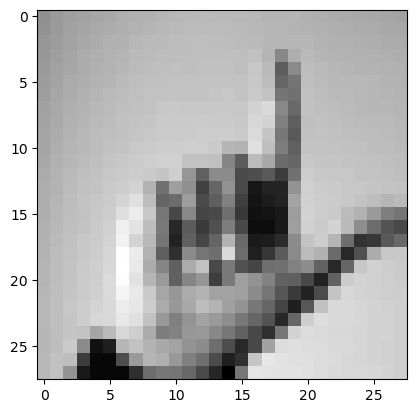

In [16]:
plt.imshow(X_train[6][:,:,0],cmap='gray')
plt.show()

In [28]:
import itertools
import keras

from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop,Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau


model = keras.models.Sequential([
                        keras.layers.Conv2D(64, (3, 3), activation='relu',padding = 'same', input_shape=(28, 28, 1)),
                        keras.layers.MaxPooling2D(2, 2),
                        keras.layers.Conv2D(128, (3, 3),padding = 'same', activation='relu'),
                        keras.layers.MaxPooling2D(2, 2),
                        keras.layers.Conv2D(512, (3, 3),padding = 'same', activation='relu'),
                        keras.layers.MaxPooling2D(2, 2),
                        
                        keras.layers.Conv2D(512, (3, 3),padding = 'same', activation='relu'),
                        keras.layers.Flatten(),
                        keras.layers.Dense(512, activation='relu'),
                        keras.layers.Dense(24, activation='softmax')])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 28, 28, 64)        640       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 14, 14, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 14, 14, 128)       73856     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 7, 7, 128)         0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 7, 7, 512)         590336    
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 3, 3, 512)        

In [29]:
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

In [30]:
epochs=10
batch_size=200

In [31]:
#Data augmentation
datagen = ImageDataGenerator(
        featurewise_center=False,   # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False, # divide each input by its std
        zca_whitening=False,# dimesion reduction
        rotation_range=15, # dimesion reduction
        zoom_range = 0.5, # Randomly zoom image 5%
        width_shift_range=0.15,   # randomly shift images horizontally 15%
        height_shift_range=0.15, # randomly shift images vertically 15%
        horizontal_flip=True,   # randomly flip images
        vertical_flip=False)  # randomly flip images

datagen.fit(X_train)

In [32]:
history = model.fit_generator(datagen.flow(X_train,Y_train, batch_size=batch_size),epochs = epochs, validation_data = (X_val,Y_val), steps_per_epoch=X_train.shape[0] // batch_size)


C:\Users\Admin\AppData\Local\Temp\ipykernel_5344\1193075716.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(datagen.flow(X_train,Y_train, batch_size=batch_size),epochs = epochs, validation_data = (X_val,Y_val), steps_per_epoch=X_train.shape[0] // batch_size)


Epoch 1/10
109/109 [==============================] - 459s 4s/step - loss: 3.1417 - accuracy: 0.0675 - val_loss: 2.8618 - val_accuracy: 0.1583
Epoch 2/10
109/109 [==============================] - 535s 5s/step - loss: 2.7652 - accuracy: 0.1536 - val_loss: 2.1032 - val_accuracy: 0.3114
Epoch 3/10
109/109 [==============================] - 628s 6s/step - loss: 2.3470 - accuracy: 0.2639 - val_loss: 1.7526 - val_accuracy: 0.4562
Epoch 4/10
109/109 [==============================] - 629s 6s/step - loss: 1.8995 - accuracy: 0.3856 - val_loss: 1.3272 - val_accuracy: 0.5484
Epoch 5/10
109/109 [==============================] - 558s 5s/step - loss: 1.4333 - accuracy: 0.5276 - val_loss: 0.5725 - val_accuracy: 0.7969
Epoch 6/10
109/109 [==============================] - 622s 6s/step - loss: 1.0714 - accuracy: 0.6430 - val_loss: 0.3781 - val_accuracy: 0.8654
Epoch 7/10
109/109 [==============================] - 617s 6s/step - loss: 0.8312 - accuracy: 0.7192 - val_loss: 0.2247 - val_accuracy: 0.9210

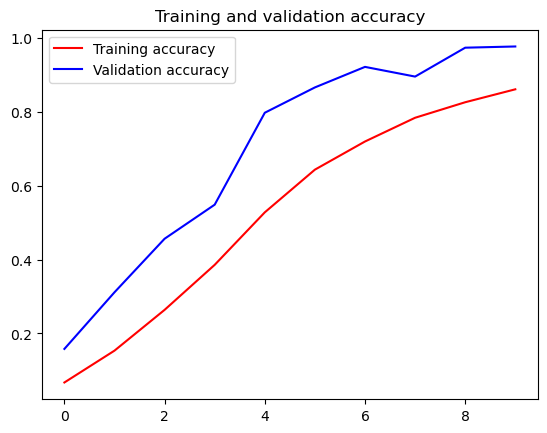

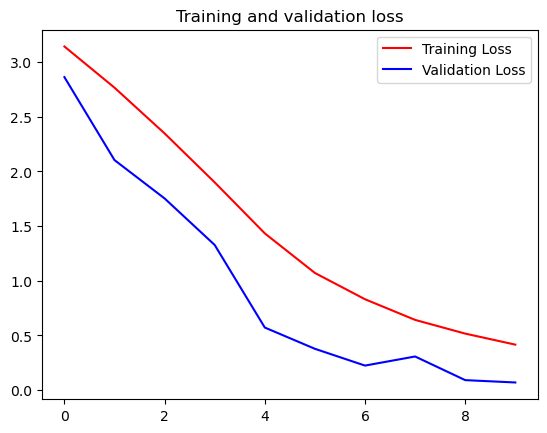

In [33]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()